In [68]:
query_phrase = 'diabetes'
#remove white spaces and make everything lower case
query_phrase= ''.join(c.lower() for c in query_phrase if not c.isspace())

In [2]:
#Download relevant data file from hscic
import urllib2

#TODO: Find datasets automatically
url = "http://www.hscic.gov.uk/catalogue/PUB16719/hosp-epis-stat-admi-diag-2013-14-tab.xlsx"

file_name = url.split('/')[-1]
u = urllib2.urlopen(url)
f = open(file_name, 'wb')
meta = u.info()
file_size = int(meta.getheaders("Content-Length")[0])
print "Downloading: %s Bytes: %s" % (file_name, file_size)

file_size_dl = 0
block_sz = 8192
while True:
    buffer = u.read(block_sz)
    if not buffer:
        break

    file_size_dl += len(buffer)
    f.write(buffer)
    status = r"%10d  [%3.2f%%]" % (file_size_dl, file_size_dl * 100. / file_size)
    status = status + chr(8)*(len(status)+1)
    print status,

f.close()

Downloading: hosp-epis-stat-admi-diag-2013-14-tab.xlsx Bytes: 5634950
      8192  [0.15%]      16384  [0.29%]      24576  [0.44%]      32768  [0.58%]      40960  [0.73%]      49152  [0.87%]      57344  [1.02%]      65536  [1.16%]      73728  [1.31%]      81920  [1.45%]      90112  [1.60%]      98304  [1.74%]     106496  [1.89%]     114688  [2.04%]     122880  [2.18%]     131072  [2.33%]     139264  [2.47%]     147456  [2.62%]     155648  [2.76%]     163840  [2.91%]     172032  [3.05%]     180224  [3.20%]     188416  [3.34%]     196608

In [69]:
# Look for dementia comments in relevant sheet.
import xlrd #importing excel reader
from collections import OrderedDict
import simplejson as json

wb = xlrd.open_workbook(file_name)
sh = wb.sheet_by_name("All Diagnoses 4 Character")

headers = sh.row_values(16)
results_list = []

for i1 in range(18,10000):
    disease = sh.row_values(i1)[1]
    disease = ''.join(c.lower() for c in disease if not c.isspace())
    if query_phrase in disease:
        row_values = sh.row_values(i1)
        print row_values
        result = OrderedDict()
        for colnum in range(len(headers)):
            result[headers[colnum]] = row_values[colnum]
            
        results_list.append(result)

print results_list

results_json = json.dumps(results_list)

print results_json

[u'E10.0', u'Insulin-dependent diabetes mellitus - With coma', 808.0, 396.0, 411.0, 397.0, 0.0, 52.265, 0.0, 6.0, 7.0, 22.0, 8.0, 5.0, 4.0, 5.0, 6.0, 45.0, 49.0, 33.0, 41.0, 64.0, 86.0, 51.0, 46.0, 55.0, 52.0, 49.0, 67.0, 54.0, 36.0, 13.0, 57.0, 105.0, 4.0, 0.0]
[u'E10.1', u'Insulin-dependent diabetes mellitus - With ketoacidosis', 24164.0, 20824.0, 11648.0, 12514.0, 2.0, 34.434, 17.0, 337.0, 404.0, 1217.0, 300.0, 547.0, 742.0, 984.0, 1005.0, 4095.0, 2394.0, 2072.0, 1542.0, 1720.0, 1656.0, 1392.0, 957.0, 632.0, 547.0, 443.0, 441.0, 303.0, 230.0, 78.0, 118.0, 1191.0, 10.0, 9.0]
[u'E10.2', u'Insulin-dependent diabetes mellitus - With renal complications', 8709.0, 327.0, 4801.0, 3908.0, 0.0, 49.849, 0.0, 0.0, 1.0, 0.0, 3.0, 3.0, 0.0, 4.0, 2.0, 62.0, 260.0, 766.0, 797.0, 1301.0, 1300.0, 1379.0, 721.0, 796.0, 525.0, 326.0, 215.0, 110.0, 45.0, 12.0, 1646.0, 441.0, 108.0, 13.0]
[u'E10.3', u'Insulin-dependent diabetes mellitus - With ophthalmic complications', 21301.0, 1119.0, 11271.0, 10030.0

In [34]:
#get all disease types and total number of people for each
dis_types = [results_list[i][""] for i in range(len(results_list))]

In [115]:
# General data_gathering for plotting
field_headers = [headers[i] for i in range(1,4)]
print field_headers

data_set = []
for field in field_headers:
    data_set.append([results_list[i][field] for i in range(len(results_list))])
    
print data_set
    

['', u'All diagnoses', u'Main diagnosis']
[[u'Insulin-dependent diabetes mellitus - With coma', u'Insulin-dependent diabetes mellitus - With ketoacidosis', u'Insulin-dependent diabetes mellitus - With renal complications', u'Insulin-dependent diabetes mellitus - With ophthalmic complications', u'Insulin-dependent diabetes mellitus - With neurological complications', u'Insulin-dependent diabetes mellitus - With peripheral circulatory complications', u'Insulin-dependent diabetes mellitus - With other specified complications', u'Insulin-dependent diabetes mellitus - With multiple complications', u'Insulin-dependent diabetes mellitus - With unspecified complications', u'Insulin-dependent diabetes mellitus - Without complications', u'Non-insulin-dependent diabetes mellitus - With coma', u'Non-insulin-dependent diabetes mellitus - With ketoacidosis', u'Non-insulin-dependent diabetes mellitus - With renal complications', u'Non-insulin-dependent diabetes mellitus - With ophthalmic complication

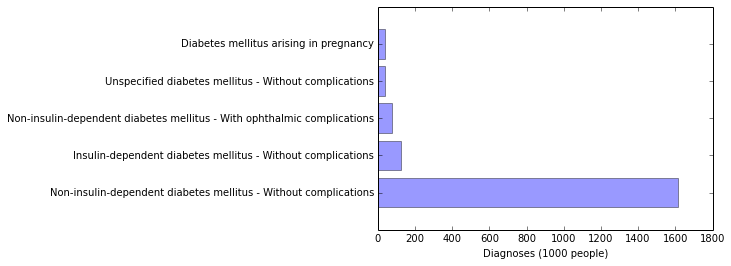

In [129]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sorted bar chart by disease type
inds = np.argsort(data_set[1])[::-1][:len(data_set[1])]
if len(inds)<=5:
    y_pos = np.arange(len(data_set[1]))
else:
    y_pos = np.arange(5)

plt.barh(y_pos, [data_set[1][inds[i]]/1000 for i in y_pos], align='center', alpha=0.4)
plt.yticks(y_pos, [data_set[0][inds[i]] for i in y_pos])
plt.xlabel('Diagnoses (1000 people)')
    

([<matplotlib.patches.Wedge at 0xb1dab46c>,
 [<matplotlib.text.Text at 0xaf542bcc>, <matplotlib.text.Text at 0xb1c517cc>],
 [<matplotlib.text.Text at 0xaf5bbb2c>, <matplotlib.text.Text at 0xaf5bb58c>])

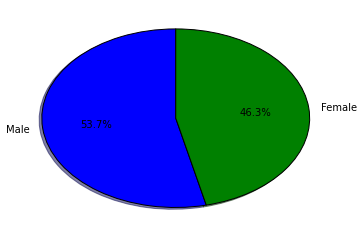

In [72]:
# Male-female ratio
plt.pie([np.sum(data_set[-2]), np.sum(data_set[-1])], labels=[field_headers[-2], field_headers[-1]], autopct='%1.1f%%', shadow=True, startangle=90)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[u'Age 0', u'Age 1-4', u'Age 5-9', u'Age 10-14', u'Age 15', u'Age 16', u'Age 17', u'Age 18', u'Age 19', u'Age 20-24', u'Age 25-29', u'Age 30-34', u'Age 35-39', u'Age 40-44', u'Age 45-49', u'Age 50-54', u'Age 55-59', u'Age 60-64', u'Age 65-69', u'Age 70-74', u'Age 75-79', u'Age 80-84']
[   4067.    2016.    3535.    6037.    1727.    1987.    2160.    2754.
    3025.   18860.   27195.   38165.   39950.   56037.   83357.  120336.
  150286.  195027.  257048.  282368.  317513.  273965.]
22
(22,)


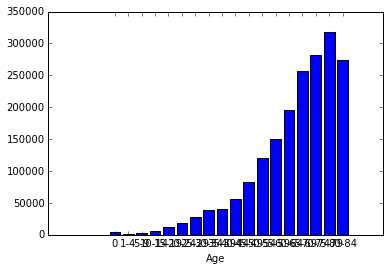

In [113]:
#Age groups data
age_columns = range(8,30)
print age_columns
field_headers = [headers[i] for i in age_columns]

print field_headers

data_set = []
for field in field_headers:
    data_set.append([results_list[i][field] for i in range(len(results_list))])


data_set = np.array(data_set)
data_set = np.sum(data_set, axis=1)
print data_set

print len(field_headers)
print data_set.shape

#Group 15-19
to_group = range(4,9)
data_set[to_group[0]] = np.sum(data_set[to_group])
data_set = np.delete(data_set,to_group[1:],0)
field_headers[to_group[0]] = "Age 15-19"
for i in to_group[1:]:
    del field_headers[to_group[1]]

field_headers = [field_headers[i][4:] for i in range(len(field_headers))]

plt.bar(range(len(data_set)), data_set, align='center')
plt.xticks(range(len(data_set)), field_headers)
plt.xlabel("Age")
plt.ylabel("# of diagnoses")


                                                     
